In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/beyond-analysis/train.csv
/kaggle/input/beyond-analysis/sample_submission_random.csv
/kaggle/input/beyond-analysis/test.csv


In [2]:
data=pd.read_csv("/kaggle/input/beyond-analysis/train.csv")


In [3]:
data.head()

,UNIQUE_IDENTIFIER,SEQUENCE_NO,STATUS_CHECK,CATEGORY_1,CATEGORY_2,ACTIVE_YN,ENTRY,REVENUE,WINNINGS_1,WINNINGS_2,...,WITHDRAW_NUMBER,DEPOSIT_TRAILS,ENTRY_NUMBER,WINNINGS_NUMBER,PRACTICE_ENTRY,PRACTICE_WINNINGS,PRACTICE_ENTRY_NUMBER,PRACTICE_WINNINGS_NUMBER,Y1,Y2
0,98481267304,1,0,M,B,1,0.00000,0.000000,0.0000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.449287,101.369863
1,98481267304,2,0,M,B,1,0.13735,0.011550,0.0999,0.0,...,0.0,0.0,1.8,1.0,0.0,0.0,0.0,0.0,4.449287,101.369863
2,98481267304,3,0,M,B,1,0.15835,0.010425,0.0242,0.0,...,0.0,0.0,0.7,0.3,0.0,0.0,0.0,0.0,4.449287,101.369863
3,98481267304,4,0,M,B,1,0.44490,0.035850,0.2398,0.0,...,0.0,0.0,2.8,1.5,0.0,0.0,0.0,0.0,4.449287,101.369863
4,98481267304,5,0,M,B,1,0.00000,0.000000,0.0000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.449287,101.369863


In [ ]:
# data.drop(["PRACTICE_ENTRY","PRACTICE_WINNINGS","PRACTICE_ENTRY_NUMBER","PRACTICE_WINNINGS_NUMBER"],axis=1,inplace=True)

In [4]:
X=data.iloc[:,:-2]
y=data.iloc[:,-2:]
X.shape,y.shape,data.shape

((1246837, 23), (1246837, 2), (1246837, 25))

In [12]:
import category_encoders as ce
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [6]:
# encoder = ce.BinaryEncoder(cols=["CATEGORY_1","CATEGORY_2"])
# X=encoder.fit_transform(X)
# X.drop(["CATEGORY_1_0","CATEGORY_2_0"],axis=1,inplace=True)

In [7]:
dat=pd.concat([X,y],axis=1)

In [8]:
dat=dat.groupby(by="UNIQUE_IDENTIFIER").mean()
X=dat.iloc[:,:-2]
y=dat.iloc[:,-2:]

In [9]:
X.shape,y.shape

((96298, 20), (96298, 2))

In [10]:
X.head()

,SEQUENCE_NO,STATUS_CHECK,ACTIVE_YN,ENTRY,REVENUE,WINNINGS_1,WINNINGS_2,DISCOUNT,DEPOSIT,DEPOSIT_NUMBER,DEPOSIT_2,WITHDRAW,WITHDRAW_NUMBER,DEPOSIT_TRAILS,ENTRY_NUMBER,WINNINGS_NUMBER,PRACTICE_ENTRY,PRACTICE_WINNINGS,PRACTICE_ENTRY_NUMBER,PRACTICE_WINNINGS_NUMBER
UNIQUE_IDENTIFIER,,,,,,,,,,,,,,,,,,,,
98481267304,4.0,0.0,1.000000,0.112236,0.008682,0.052929,0.0,0.000000,0.035714,0.014286,0.035714,0.000000,0.000000,0.000000,0.928571,0.442857,0.0,0.0,0.0,0.0
98481267698,10.0,1.0,0.947368,30.285742,3.733455,25.120618,0.0,1.163158,10.263158,0.052632,0.526316,1.357895,0.010526,0.684211,0.700000,0.247368,0.0,0.0,0.0,0.0
98481269325,9.5,0.0,1.000000,0.083720,0.007540,0.052828,0.0,0.033333,0.013889,0.005556,0.013889,0.000000,0.000000,0.027778,1.311111,0.305556,0.0,0.0,0.0,0.0
98481271512,3.0,0.0,1.000000,0.777000,0.122220,0.017000,0.0,0.240000,0.700000,0.040000,0.200000,0.000000,0.000000,0.540000,0.900000,0.040000,0.0,0.0,0.0,0.0
98481273023,1.0,0.0,1.000000,0.500000,0.080000,0.000000,0.0,0.000000,0.500000,0.100000,0.500000,0.000000,0.000000,0.000000,0.200000,0.000000,0.0,0.0,0.0,0.0


In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:
# sc= StandardScaler()
# X_train=sc.fit_transform(X_train)
# X_test=sc.transform(X_test)

In [14]:
y_train=np.array(y_train)
y_test=np.array(y_test)

In [15]:
X_train=X_train.astype(np.float32)
X_test=X_test.astype(np.float32)
y_train=y_train.astype(np.float32)
y_test=y_test.astype(np.float32)

In [16]:
import torch
from torch import nn
import torch.nn.functional as F
from torch import optim
from torch.utils.data._utils.collate import default_collate
from torch.utils.data import Subset
from torch.utils.data import DataLoader, TensorDataset
from torch import Tensor
import matplotlib.pyplot as plt

In [ ]:
# # use this when we want y to be  N * 2 
# def train_val_dataset():
#     datasets = {}
#     train_data=np.concatenate((X_train,y_train),axis=1)
#     datasets['train'] =torch.from_numpy(train_data)
    
#     test_data=np.concatenate((X_test,y_test),axis=1)
#     datasets['val'] = torch.from_numpy(test_data)
#     return datasets

In [17]:
##use this when we want y to be N * 1
def train_val_dataset():
    datasets = {}
    train_data=np.concatenate((X_train,y_train[:,0].reshape(-1,1)),axis=1)
    datasets['trainy1'] =torch.from_numpy(train_data)
    train_data=np.concatenate((X_train,y_train[:,1].reshape(-1,1)),axis=1)
    datasets['trainy2'] =torch.from_numpy(train_data)
    test_data=np.concatenate((X_test,y_test[:,0].reshape(-1,1)),axis=1)
    datasets['valy1'] = torch.from_numpy(test_data)
    test_data=np.concatenate((X_test,y_test[:,1].reshape(-1,1)),axis=1)
    datasets['valy2'] = torch.from_numpy(test_data)
    return datasets

In [18]:
datasets=train_val_dataset()

In [ ]:
# datasets["train"].shape

In [19]:
datasets["trainy1"].shape

torch.Size([72223, 21])

In [20]:
class SampleModel(nn.Module):
    def __init__(self,input_size,h1,h2,h3,h4,p):
        super(SampleModel, self).__init__()
        self.fc1=nn.Linear(input_size,h1) # 28 --> 32
        self.dp1=nn.Dropout(p)
        self.fc2=nn.Linear(h1,h2) # 32 --> 16
        self.fc3=nn.Linear(h2,h3) # 16 --> 4
        self.dp2=nn.Dropout(p)
        self.fc4=nn.Linear(h3,h4) # 4 --> 2
    def forward(self,x):
        x=self.fc1(x).relu()
#         x=self.dp1(x)
        x=self.fc2(x).relu()
        x=self.fc3(x).relu()
#         x=self.dp2(x)
        x=self.fc4(x)
        return x      
        

In [ ]:
# # when y - N * 2
# def evaluate(data,model):
#     l=0
#     for batch in torch.utils.data.DataLoader(data, batch_size = 1024, shuffle = True, collate_fn=default_collate):
#         X_train=batch[:,:-2]
#         Y_train=batch[:,-2:] #  for y1 Y_train=batch[:,-2] for y2 Y_train=batch[:,-1]
#         yhat=model(X_train)
#         l+=F.mse_loss(yhat,Y_train).item()
#     return l
    

In [21]:
# when y N * 1
def evaluate(data,model):
    l=0
    for batch in torch.utils.data.DataLoader(data, batch_size = 1024, shuffle = True, collate_fn=default_collate):
        X_train=batch[:,:-1]
        Y_train=batch[:,-1].reshape(-1,1) #  for y1 Y_train=batch[:,-2] for y2 Y_train=batch[:,-1]
        yhat=model(X_train)
        l+=F.mse_loss(yhat,Y_train).item()
    return l
    

In [ ]:
# ## when y is N * 2
# def fitv1(model,opt,datasets,epochs=100):
#     losses=[]
#     prev=float('inf')
#     for i in range(epochs):
#         for batch in torch.utils.data.DataLoader(datasets["train"], batch_size = 1024, shuffle = True):
#             X_train=batch[:,:-2]
#             Y_train=batch[:,-2:] #  for y1 Y_train=batch[:,-2] for y2 Y_train=batch[:,-1]
#             yhat=model(X_train)
#             loss=F.mse_loss(yhat,Y_train)
#             opt.zero_grad()
#             loss.backward()
#       # torch.nn.utils.clip_grad_norm_(model.parameters(), 10)
#             opt.step()      
# #             train_acc=evaluate(datasets['train'])
# #             test_acc=evaluate(datasets['val'])
#             test_acc=loss.item()
#         train_acc=evaluate(datasets['train'],model)
#         test_acc=evaluate(datasets['val'],model)
#         if(test_acc<prev):
#             modelcopy["epoch"]=i
#             modelcopy['model_state_dict']=model.state_dict().copy()
#             prev=test_acc
#             print("Saving the improved model")
        
#         print("Iteration (epoch) %d / %d , Loss %0.2f Train mse %0.2f Test mse %0.2f"%(i,epochs,loss.item(),train_acc,test_acc))
#         losses.append((train_acc+test_acc)/2)
#     plt.plot(losses)
#     return model
        

In [22]:
# when  y is N*1
def fitv1(model,opt,traindata,testdata,epochs=100):
    losses=[]
    prev=float('inf')
    for i in range(epochs):
        for batch in torch.utils.data.DataLoader(traindata, batch_size = 1024, shuffle = True):
            X_train=batch[:,:-1]
            Y_train=batch[:,-1].reshape(-1,1) #  for y1 Y_train=batch[:,-2] for y2 Y_train=batch[:,-1]
            yhat=model(X_train)
            loss=F.mse_loss(yhat,Y_train)
            opt.zero_grad()
            loss.backward()
      # torch.nn.utils.clip_grad_norm_(model.parameters(), 10)
            opt.step()      
#             train_acc=evaluate(datasets['train'])
#             test_acc=evaluate(datasets['val'])
            test_acc=loss.item()
        train_acc=evaluate(traindata,model)
        test_acc=evaluate(testdata,model)
        if(test_acc<prev):
            modelcopy["epoch"]=i
            modelcopy['model_state_dict']=model.state_dict().copy()
            prev=test_acc
            print("Saving the improved model")
        
        
        print("Iteration (epoch) %d / %d , Loss %0.2f Train mse %0.2f Test mse %0.2f"%(i,epochs,loss.item(),train_acc,test_acc))
        losses.append((train_acc+test_acc)/2)
    plt.plot(losses)
    return model
        

In [ ]:
# # Hyperparameters y is N*2
# lr=0.01
# epochs=15
# input_size=28
# hidden_layer1=32
# hidden_layer2=16
# hidden_layer3=4
# hidden_layer4=2  # hidden_layer4=1
# p=0.2

# # creating CUDA device
# if(torch.cuda.device_count()>0):
#     dev="cuda"
#     print("CUDA available, using it")
# else:
#     dev="cpu"
#     print("No CUDA")
# device=torch.device(dev)

# datasets["train"]=datasets["train"].to(device)
# datasets["val"]=datasets["val"].to(device)
# # Creating an object of the model
# model=SampleModel(input_size,hidden_layer1,hidden_layer2,hidden_layer3,hidden_layer4,p)
# # Moving the model to GPU
# model.to(device)
# # Creating the optimizer
# opt=optim.Adam(model.parameters(), lr=lr, betas=(0.9, 0.999), eps=1e-08, weight_decay=0, amsgrad=True)
# # opt=optim.SGD(model.parameters(),lr=lr)
# modelcopy={}
# # Training the model
# model=fitv1(model,opt,datasets,epochs)


In [ ]:
# torch.save(modelcopy['model_state_dict'],"modelboth_best.pth")
# torch.save(model.state_dict(),"modelboth_end.pth")

No CUDA
Saving the improved model
Iteration (epoch) 0 / 15 , Loss 25.11 Train mse 4132.00 Test mse 1182.61
Saving the improved model
Iteration (epoch) 1 / 15 , Loss 17.50 Train mse 3754.20 Test mse 1102.46
Iteration (epoch) 2 / 15 , Loss 49.70 Train mse 4003.35 Test mse 1209.84
Saving the improved model
Iteration (epoch) 3 / 15 , Loss 76.24 Train mse 4121.58 Test mse 1086.82
Saving the improved model
Iteration (epoch) 4 / 15 , Loss 30.82 Train mse 3412.73 Test mse 1046.78
Saving the improved model
Iteration (epoch) 5 / 15 , Loss 26.59 Train mse 3380.33 Test mse 1027.24
Saving the improved model
Iteration (epoch) 6 / 15 , Loss 19.99 Train mse 3389.27 Test mse 1026.26
Iteration (epoch) 7 / 15 , Loss 34.45 Train mse 4117.20 Test mse 1271.32
Iteration (epoch) 8 / 15 , Loss 9.51 Train mse 3602.14 Test mse 1098.68
Iteration (epoch) 9 / 15 , Loss 71.01 Train mse 3561.28 Test mse 1079.84
Iteration (epoch) 10 / 15 , Loss 34.86 Train mse 3305.14 Test mse 1051.79
Iteration (epoch) 11 / 15 , Loss 

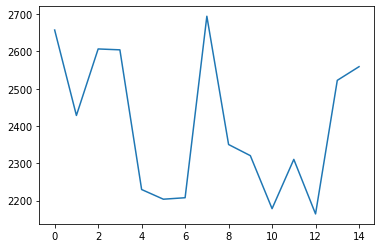

In [24]:
# Hyperparameters for y1 variable 
lr=0.01
epochs=15
input_size=20
hidden_layer1=32
hidden_layer2=16
hidden_layer3=4
hidden_layer4=1  # hidden_layer4=1
p=0.2

# creating CUDA device
if(torch.cuda.device_count()>0):
    dev="cuda"
    print("CUDA available, using it")
else:
    dev="cpu"
    print("No CUDA")
device=torch.device(dev)

datasets["trainy1"]=datasets["trainy1"].to(device)
datasets["valy1"]=datasets["valy1"].to(device)
# Creating an object of the model
modely1=SampleModel(input_size,hidden_layer1,hidden_layer2,hidden_layer3,hidden_layer4,p)
# Moving the model to GPU
modely1.to(device)
# Creating the optimizer
opt=optim.Adam(modely1.parameters(), lr=lr, betas=(0.9, 0.999), eps=1e-08, weight_decay=0, amsgrad=True)
# opt=optim.SGD(model.parameters(),lr=lr)
modelcopy={}
# Training the model
modely1=fitv1(modely1,opt,datasets["trainy1"],datasets["valy1"],epochs)


In [25]:
torch.save(modelcopy['model_state_dict'],"modely1_best.pth")
torch.save(modely1.state_dict(),"modely1_end.pth")

In [ ]:
# # Hyperparameters for y2 variable
# lr=0.01
# epochs=15
# input_size=28
# hidden_layer1=32
# hidden_layer2=16
# hidden_layer3=4
# hidden_layer4=1  # hidden_layer4=1
# p=0.2

# # creating CUDA device
# if(torch.cuda.device_count()>0):
#     dev="cuda"
#     print("CUDA available, using it")
# else:
#     dev="cpu"
#     print("No CUDA")
# device=torch.device(dev)

# datasets["trainy2"]=datasets["trainy2"].to(device)
# datasets["valy2"]=datasets["valy2"].to(device)
# # Creating an object of the model
# modely2=SampleModel(input_size,hidden_layer1,hidden_layer2,hidden_layer3,hidden_layer4,p)
# # Moving the model to GPU
# modely2.to(device)
# # Creating the optimizer
# opt2=optim.Adam(modely2.parameters(), lr=lr, betas=(0.9, 0.999), eps=1e-08, weight_decay=0, amsgrad=True)
# # opt=optim.SGD(model.parameters(),lr=lr)
# modelcopy={}
# # Training the model
# modely2=fitv1(modely2,opt2,datasets["trainy2"],datasets["valy2"],epochs)


In [ ]:
# torch.save(modelcopy['model_state_dict'],"model2_15_msd.pth")


In [ ]:
# torch.save(modelcopy['model_state_dict'],"modely2_best.pth")
# torch.save(modely2.state_dict(),"modely2_end.pth")

In [26]:
modely1=SampleModel(input_size,hidden_layer1,hidden_layer2,hidden_layer3,1,1)

In [ ]:
modely1

In [27]:
modely1.load_state_dict(torch.load("modely1_best.pth"))
modely1.to(device)

SampleModel(
  (fc1): Linear(in_features=20, out_features=32, bias=True)
  (dp1): Dropout(p=1, inplace=False)
  (fc2): Linear(in_features=32, out_features=16, bias=True)
  (fc3): Linear(in_features=16, out_features=4, bias=True)
  (dp2): Dropout(p=1, inplace=False)
  (fc4): Linear(in_features=4, out_features=1, bias=True)
)

In [28]:
test=pd.read_csv("/kaggle/input/beyond-analysis/test.csv")
# test.drop(["PRACTICE_ENTRY","PRACTICE_WINNINGS","PRACTICE_ENTRY_NUMBER","PRACTICE_WINNINGS_NUMBER"],axis=1,inplace=True)

In [ ]:
# test=encoder.transform(test)
# test.head()


In [29]:
test=test.groupby("UNIQUE_IDENTIFIER").mean().reset_index()
test.head()

,UNIQUE_IDENTIFIER,SEQUENCE_NO,STATUS_CHECK,ACTIVE_YN,ENTRY,REVENUE,WINNINGS_1,WINNINGS_2,DISCOUNT,DEPOSIT,...,DEPOSIT_2,WITHDRAW,WITHDRAW_NUMBER,DEPOSIT_TRAILS,ENTRY_NUMBER,WINNINGS_NUMBER,PRACTICE_ENTRY,PRACTICE_WINNINGS,PRACTICE_ENTRY_NUMBER,PRACTICE_WINNINGS_NUMBER
0,98481269471,1.5,0.0,0.500000,2.987500,0.452500,0.205000,0.000000,1.200000,2.750000,...,0.500000,0.0,0.0,4.900000,0.700000,0.100000,0.000000,0.000000,0.000000,0.000000
1,98481270499,1.5,1.0,1.000000,0.900000,0.135000,0.552500,0.000000,0.000000,0.500000,...,0.500000,0.0,0.0,0.000000,1.800000,0.650000,0.000000,0.000000,0.000000,0.000000
2,98481272694,10.0,0.0,1.000000,0.006579,0.000987,0.002237,0.000000,0.210526,0.526316,...,0.526316,0.0,0.0,0.000000,0.026316,0.005263,3.216236,2.155537,1.905263,0.557895
3,98481273365,14.0,0.0,0.962963,0.565898,0.086024,0.329983,0.250556,0.111852,0.222222,...,0.018519,0.0,0.0,0.033333,0.433333,0.129630,0.000000,0.000000,0.000000,0.000000
4,98481278321,3.0,0.0,0.800000,0.660956,0.062309,0.112740,0.000000,0.360000,0.500000,...,0.200000,0.0,0.0,0.000000,3.520000,1.220000,0.000000,0.000000,0.000000,0.000000


In [31]:
idx=test.iloc[:,0]
testpyt=torch.from_numpy(np.array(test.iloc[:,1:]).astype(np.float32))
testpyt.shape

torch.Size([65242, 20])

In [32]:
testpyt=testpyt.to(device)

In [37]:

#  y=model.forward(testpyt)
#  y=y.to("cpu")
#  y=y.detach().numpy()
# # # fd=pd.DataFrame({"UNIQUE_IDENTIFIER":idx,"Y1":y[:,0],"Y2":y[:,1]})
# # # fd.groupby(by="UNIQUE_IDENTIFIER").mean().to_csv("sub3_15.csv")

In [34]:
y1=modely1.forward(testpyt)
y1=y1.to("cpu")
y1=y1.detach().numpy()

In [38]:
# fd=pd.DataFrame({"UNIQUE_IDENTIFIER":idx,"Y1":y1.reshape(-1),"Y2":y[:,1]})
# fd.groupby(by="UNIQUE_IDENTIFIER").mean().to_csv("submixed_approach_groupby_practice_removed.csv")

In [ ]:
# y2=modely2.forward(testpyt)
# y2=y2.to("cpu")
# y2=y2.detach().numpy()

In [ ]:
# fd=pd.DataFrame({"UNIQUE_IDENTIFIER":idx,"Y1":y1.reshape(-1),"Y2":y2.reshape(-1)})
# fd.groupby(by="UNIQUE_IDENTIFIER").mean().to_csv("sub_seperate.csv")


In [39]:
# y1.shape